In [33]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [34]:
df = pd.read_csv(r'C:\Users\91936\Desktop\Datasets\Titanic\titanic.csv', encoding='unicode_escape')

In [ ]:
#Data Cleaning

In [47]:
df.sort_values('Pclass', ascending=True, inplace=True)

In [48]:
df.dropna(subset=['Embarked'], inplace=True)

In [ ]:
#Data Visualization

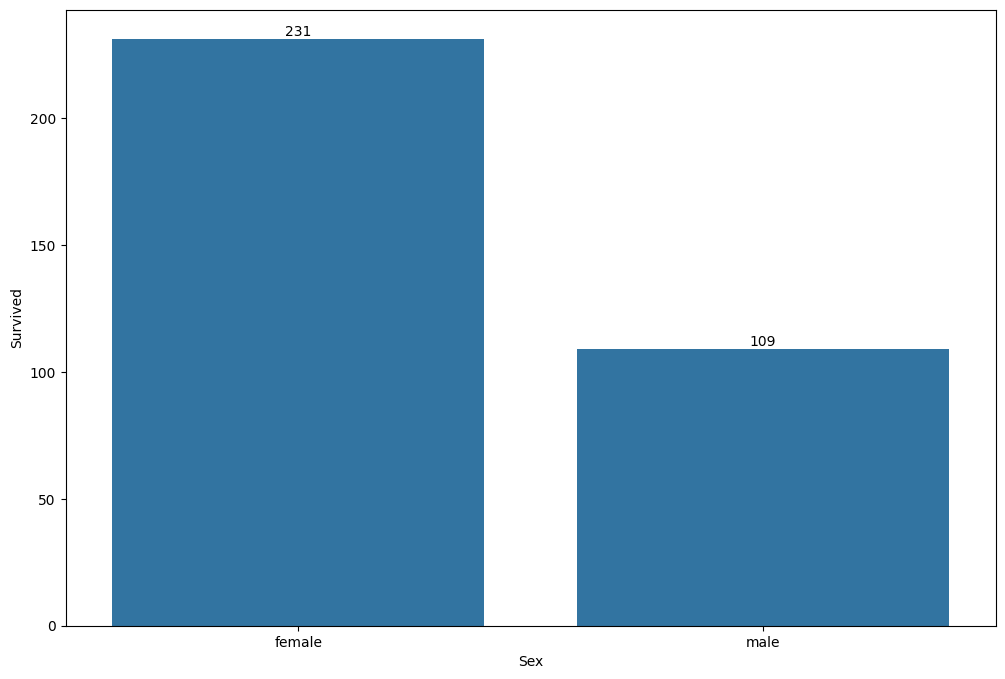

In [49]:
survived_ratio = df.groupby('Sex')['Survived'].sum().reset_index()
ax = sns.barplot(x='Sex', y='Survived', data = survived_ratio)
for bars in ax.containers:
    ax.bar_label(bars)

Text(0, 0.5, 'Fare Category')

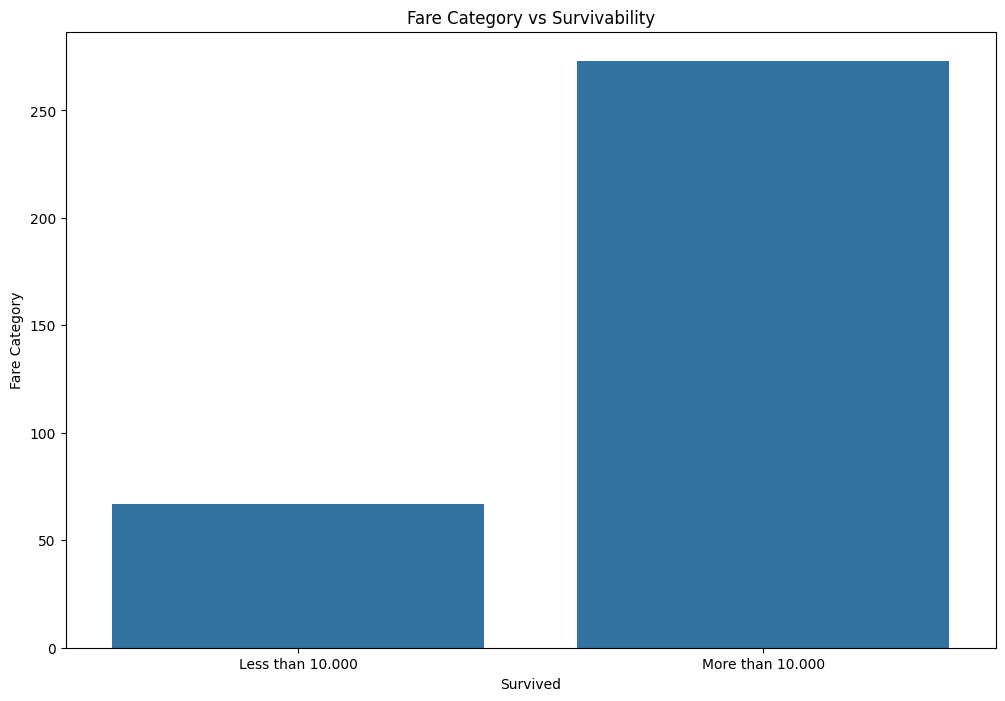

In [90]:
df['Fare_Category'] = pd.cut(df['Fare'], bins=[-float('inf'), 10.000, float('inf')], labels=['Less than 10.000', 'More than 10.000'])
survived_group = df.groupby('Fare_Category')['Survived'].sum().reset_index()
sns.barplot(x='Fare_Category', y='Survived', data=survived_group )
plt.title('Fare Category vs Survivability')
plt.xlabel('Survived')
plt.ylabel('Fare Category')

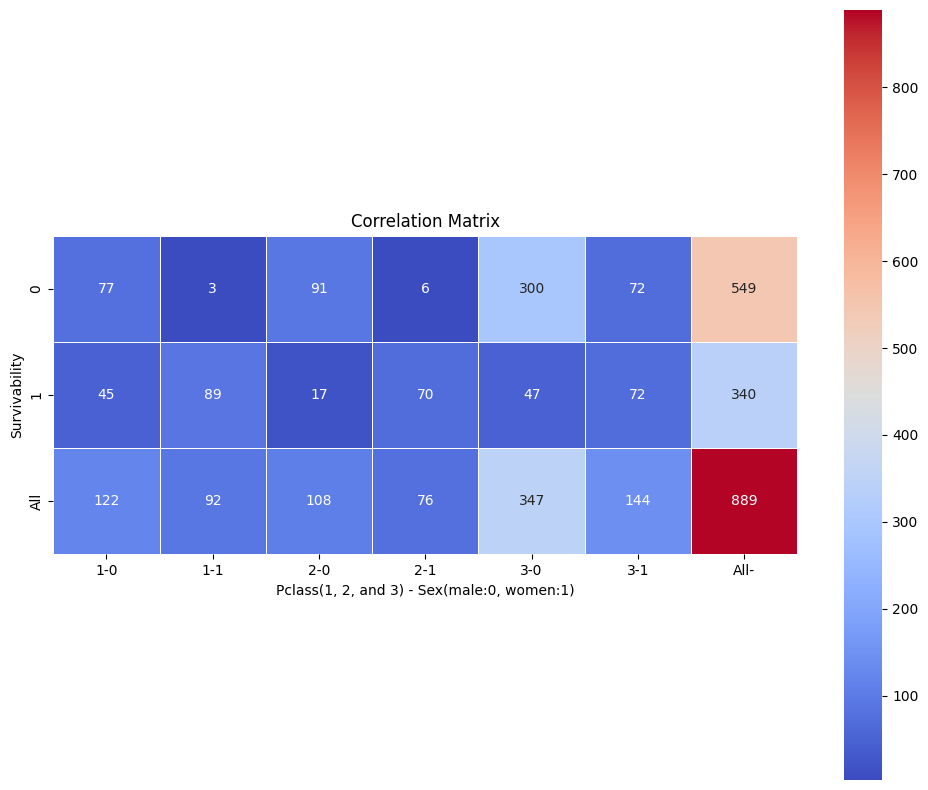

In [89]:
specific_columns = df[['Survived', 'Pclass', 'Sex']]
survived_data = specific_columns[specific_columns['Survived'] == 1]


sex_mapping = {'male': 0, 'female': 1}
specific_columns.loc[:, 'Sex'] = specific_columns['Sex'].map(sex_mapping)

contingency_table = pd.crosstab(index=specific_columns['Survived'],
                                columns=[specific_columns['Pclass'], specific_columns['Sex']],
                                margins=True)

plt.figure(figsize=(12, 10))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d', linewidths=.5, square=True)
plt.xlabel('Pclass(1, 2, and 3) - Sex(male:0, women:1)')
plt.ylabel('Survivability')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#This shows that Women at Pclass(1) had the best chance of surviving
#Men at Pclass(3) had the least chance of surviving
#While Women at Pclass(3) had a 50% chance of surviving